<img src="https://www.sme-news.co.uk/wp-content/uploads/2021/09/Online-Offline-Retail.jpg" alt="Alternative text" />

# **import Libraries**

**Prerequisite for code execution:**



```
! pip install ydata-profiling
```

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import datetime as dt
from wordcloud import WordCloud

# from pandas_profiling import ProfileReport
from ydata_profiling import ProfileReport

# preprocessing
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
import copy

# model
from sklearn.cluster import KMeans, DBSCAN

# metric
from sklearn.metrics import silhouette_score

# Settings the warnings to be ignored
from warnings import filterwarnings
filterwarnings("ignore")


# Setting Configurations:
pd.set_option('display.max_columns', 100)


# **Load Data**

In [ ]:
data = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Filoger/tamrin_quera/ML/Clustering/Recommendation System/Online Retail.xlsx")

# **Dataset Overview**

**Dataset Information:**
This Online Retail II dataset contains all the transactions that occurred for a UK-based and registered non-store online retail company between 01/12/2009 and 09/12/2011. The company primarily sells unique all-occasion giftware. Many customers of the company are wholesalers.

**This dataset includes the following features:**

1. **InvoiceNo:**
   This feature displays the invoice number (or order number). Each invoice has a unique number and is typically represented as a numerical or alphanumeric code.

2. **StockCode:**
   This feature displays the stock code (or product code). Each item or product usually has a specific identifier or code, which is displayed as a numerical or alphanumeric combination.

3. **Description:**
   This feature provides a description or details related to the item or product. It includes details such as the item's name, brand, features, and specifications.

4. **Quantity:**
   This feature displays the quantity of items sold or purchased. This quantity is usually represented as a numerical value.

5. **InvoiceDate:**
   This feature shows the date and time of invoice or order issuance. This date is typically presented as a date and time (day, month, year, hour, and minute).

6. **UnitPrice:**
   This feature shows the unit price of the item or product. It is typically represented as a numerical value and indicates the price for one unit of the item.

7. **CustomerID:**
   This feature displays the customer's identifier. Each customer usually has a unique ID, which allows for customer management and tracking.

8. **Country:**
   This feature indicates the country associated with the customer or company. It specifies the country from which the customer or order was received.

In [ ]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
data.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [ ]:
row, col = data.shape
print(f"Number of Row: {row}")
print(f"Number of Columns: {col}")

Number of Row: 541909
Number of Columns: 8


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [ ]:
data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

# **EDA**

## **Null And Type Analysis**

In [ ]:
info = pd.DataFrame({
    "pct_missing_value": data.isna().sum() / data.shape[0],
    "number_of_missing_value": data.isna().sum(),
    "type": data.dtypes
})

info.style.background_gradient(cmap="coolwarm")

,pct_missing_value,number_of_missing_value,type
InvoiceNo,0.000000,0,object
StockCode,0.000000,0,object
Description,0.002683,1454,object
Quantity,0.000000,0,int64
InvoiceDate,0.000000,0,datetime64[ns]
UnitPrice,0.000000,0,float64
CustomerID,0.249267,135080,float64
Country,0.000000,0,object


In [ ]:
pd.DataFrame(data.dtypes.value_counts(), columns=["Number_Of_Data_Type"]).style.background_gradient(cmap="coolwarm")

,Number_Of_Data_Type
object,4
float64,2
int64,1
datetime64[ns],1


## **Unique Analysis**

In [ ]:
pd.DataFrame({
    "number_of_unique_value": data.nunique(),
    "type": data.dtypes
}).style.background_gradient(cmap="coolwarm")

,number_of_unique_value,type
InvoiceNo,25900,object
StockCode,4070,object
Description,4223,object
Quantity,722,int64
InvoiceDate,23260,datetime64[ns]
UnitPrice,1630,float64
CustomerID,4372,float64
Country,38,object


## **Statistical Analysis**

In [ ]:
pd.DataFrame(data.describe()).T.style.background_gradient(cmap="coolwarm")

,count,mean,std,min,25%,50%,75%,max
Quantity,541909.000000,9.552250,218.081158,-80995.000000,1.000000,3.000000,10.000000,80995.000000
UnitPrice,541909.000000,4.611114,96.759853,-11062.060000,1.250000,2.080000,4.130000,38970.000000
CustomerID,406829.000000,15287.690570,1713.600303,12346.000000,13953.000000,15152.000000,16791.000000,18287.000000


In [ ]:
data.describe(exclude="number").T

,count,unique,top,freq,first,last
InvoiceNo,541909.0,25900.0,573585.0,1114.0,NaT,NaT
StockCode,541909,4070,85123A,2313,NaT,NaT
Description,540455,4223,WHITE HANGING HEART T-LIGHT HOLDER,2369,NaT,NaT
InvoiceDate,541909,23260,2011-10-31 14:41:00,1114,2010-12-01 08:26:00,2011-12-09 12:50:00
Country,541909,38,United Kingdom,495478,NaT,NaT


## **Outlier Analysis**

<function matplotlib.pyplot.show(close=None, block=None)>

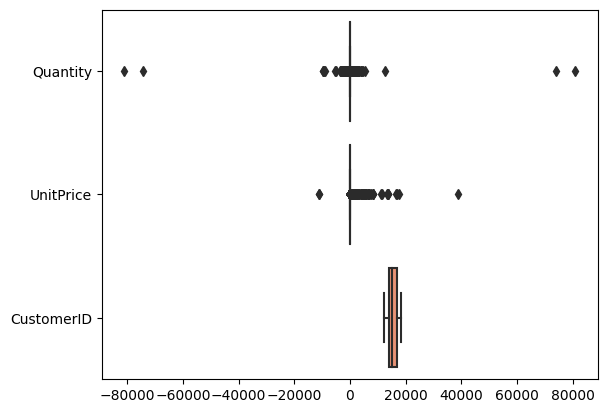

In [ ]:
sns.boxplot(data=data, orient="h", palette="magma")
plt.show

In [ ]:
data_copy = data[["CustomerID", "Quantity", "UnitPrice"]]


Q1 = data_copy.quantile(0.25)
Q3 = data_copy.quantile(0.75)
IQR = Q3 - Q1

num_outliers = ((data_copy < (Q1 - 2.5 * IQR)) | (data_copy > (Q3 + 2.5 * IQR))).sum()

pd.DataFrame({
    "Number_Of_Outliers": num_outliers
}).sort_values(by="Number_Of_Outliers", ascending=False).style.background_gradient(cmap="coolwarm")

,Number_Of_Outliers
Quantity,26389
UnitPrice,20113
CustomerID,0


## **Correlation Analysis**

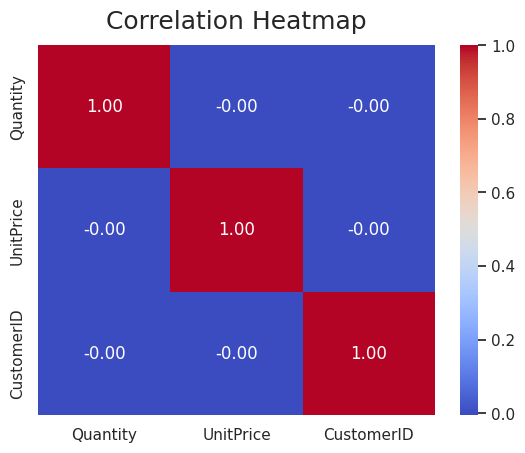

In [ ]:
heatmap = sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap="coolwarm")
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

## **Duplicated**

In [ ]:
duplicated_row = data[data.duplicated()]

print(f"Number of duplicate data: {len(duplicated_row)}")

Number of duplicate data: 5268


In [ ]:
df_dup = data[data.duplicated(keep=False)]
df_dup[df_dup["Description"] == "SCOTTIE DOG HOT WATER BOTTLE"]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
485,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom
2190,536569,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 15:35:00,4.95,16274.0,United Kingdom
2195,536569,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 15:35:00,4.95,16274.0,United Kingdom
410344,572103,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2011-10-20 15:57:00,4.95,17571.0,United Kingdom
410470,572103,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2011-10-20 15:57:00,4.95,17571.0,United Kingdom
452179,575325,22111,SCOTTIE DOG HOT WATER BOTTLE,2,2011-11-09 13:46:00,4.95,17293.0,United Kingdom
452191,575325,22111,SCOTTIE DOG HOT WATER BOTTLE,2,2011-11-09 13:46:00,4.95,17293.0,United Kingdom
477459,577058,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2011-11-17 14:29:00,4.95,18122.0,United Kingdom
477487,577058,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2011-11-17 14:29:00,4.95,18122.0,United Kingdom


## **Distribution Based On Features**

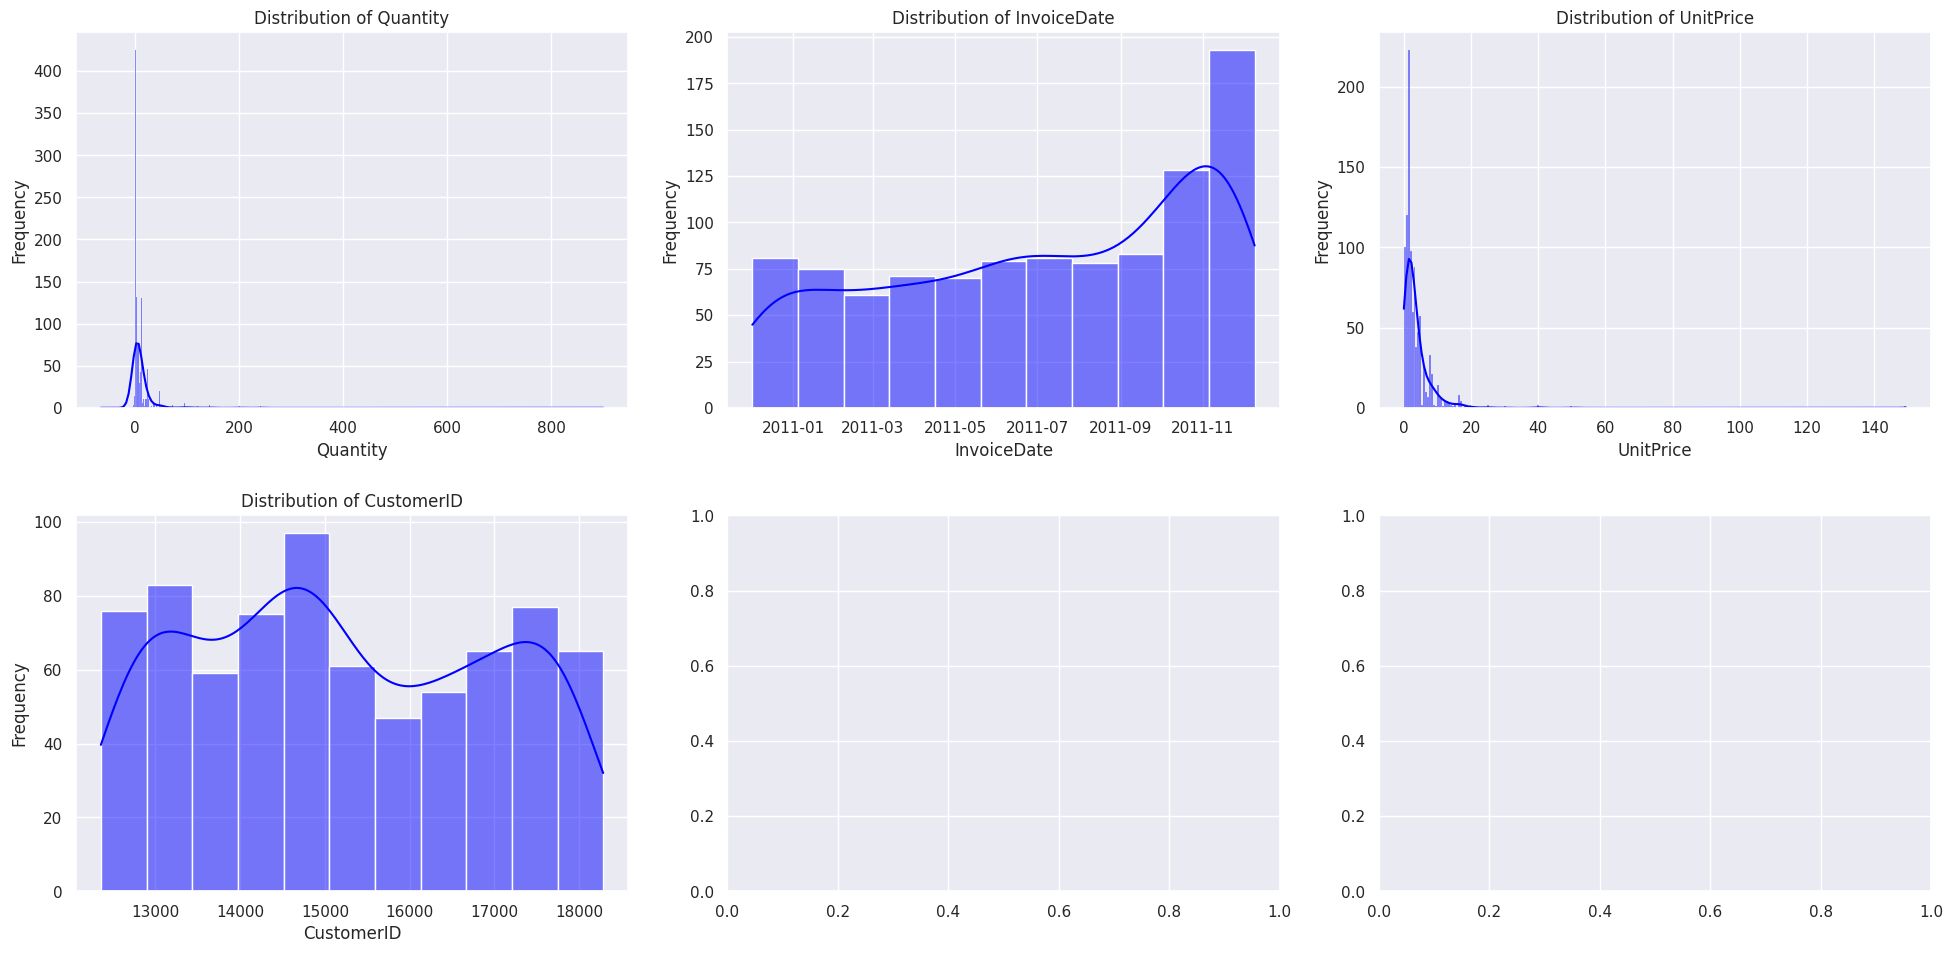

In [ ]:
def plot_distributions(data, color="blue"):
    """
    This function takes a pandas DataFrame as input and plots the distribution of each feature
    in a single figure. The number of rows and columns in the figure is determined dynamically
    based on the number of features in the DataFrame. The "darkgrid" theme from seaborn is applied
    to the plots. You can specify a color for the bars in the histogram by passing a "color" parameter.
    """
    sns.set_theme(style='darkgrid')  # set the seaborn theme

    n_cols = 3  # set the number of columns per row
    num_features = len(data.columns)
    n_rows = math.ceil(num_features / n_cols)

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5*n_rows))
    plt.subplots_adjust(wspace=0.8, hspace=0.5 , bottom=0.30)

    for i, columns in enumerate(data.columns):
        row = i // n_cols
        col = i % n_cols

        sns.histplot(data=data, kde=True, x=columns, ax=axes[row, col], color=color)
        axes[row, col].set_title(f'Distribution of {columns}')
        axes[row, col].set_xlabel(columns)
        axes[row, col].set_ylabel('Frequency')

    fig.tight_layout(pad=2.0)
    plt.show

data_sample = data.sample(n=1000)
selected_col_hist = [
    "Quantity", "InvoiceDate", "UnitPrice", "CustomerID"
]

plot_distributions(data_sample[selected_col_hist])

## **Profiling Report**

In [ ]:
ProfileReport(data, title="Pandas Profiling Report")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]



---



---



### **Top 5 countries with customer order lists having most product varieties**

In [ ]:
pd.DataFrame(data["Country"].value_counts().sort_values(ascending=False).head()).style.background_gradient(cmap="coolwarm")

,Country
United Kingdom,495478
Germany,9495
France,8557
EIRE,8196
Spain,2533


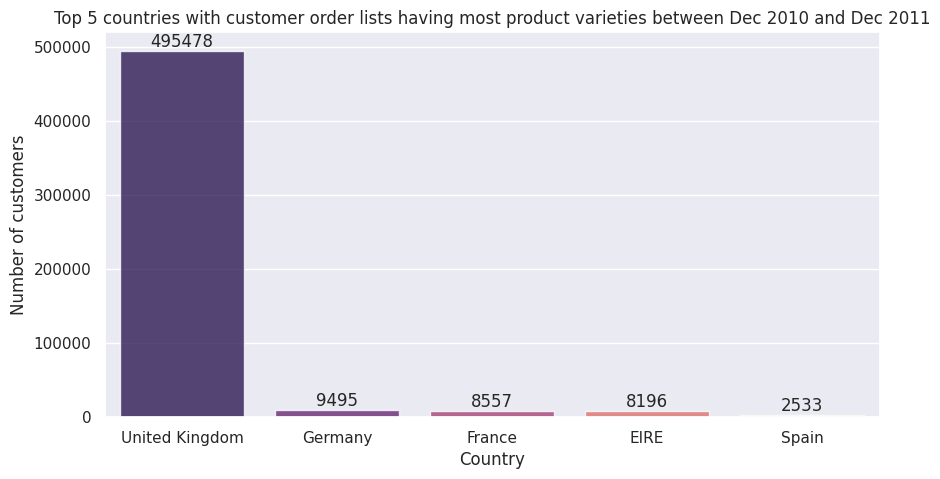

In [ ]:
country_count = data['Country'].value_counts()[:5]
plt.figure(figsize=(10, 5))
ax = sns.barplot(x=country_count.index, y=country_count.values, alpha=0.8, palette="magma")
ax.bar_label(ax.containers[0])
plt.title('Top 5 countries with customer order lists having most product varieties between Dec 2010 and Dec 2011')
plt.ylabel('Number of customers', fontsize=12)
plt.xlabel('Country', fontsize=12)
plt.show()

### **The 5 Most Common Products Purchased**

In [ ]:
pd.DataFrame({
    "Number_Of_Product": data['Description'].value_counts().sort_values(ascending=False).head()
}).style.background_gradient(cmap="coolwarm")

,Number_Of_Product
WHITE HANGING HEART T-LIGHT HOLDER,2369
REGENCY CAKESTAND 3 TIER,2200
JUMBO BAG RED RETROSPOT,2159
PARTY BUNTING,1727
LUNCH BAG RED RETROSPOT,1638


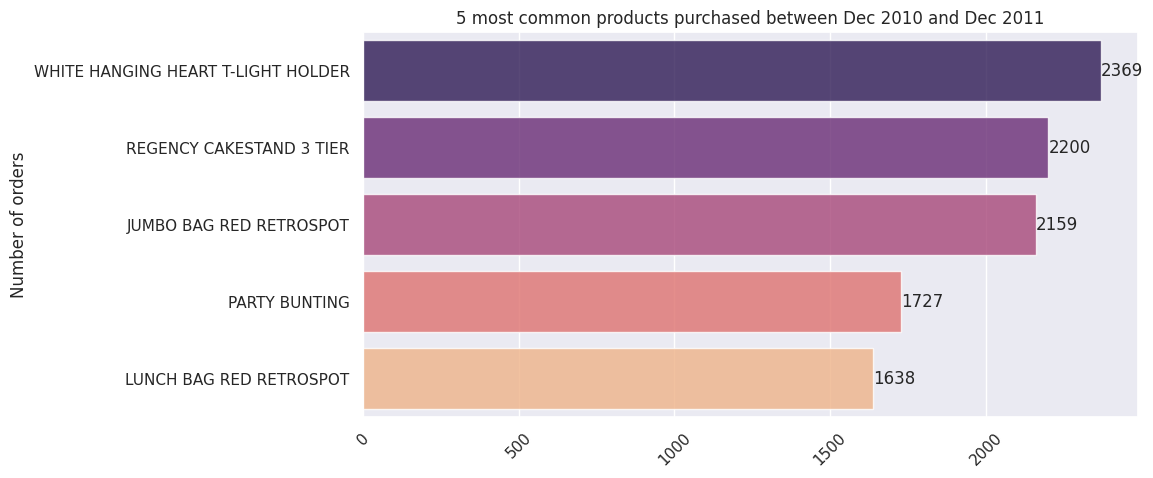

In [ ]:
description_count  = data['Description'].value_counts().sort_values(ascending=False)[:5]
plt.figure(figsize=(10, 5))
ax = sns.barplot(x=description_count.values, y=description_count.index, alpha=0.8, palette="magma")
ax.bar_label(ax.containers[0])
plt.title('5 most common products purchased between Dec 2010 and Dec 2011')
plt.ylabel('Number of orders', fontsize=12)
plt.xticks(rotation=45)
plt.show()

### **The 5 Least Common Products Purchased**

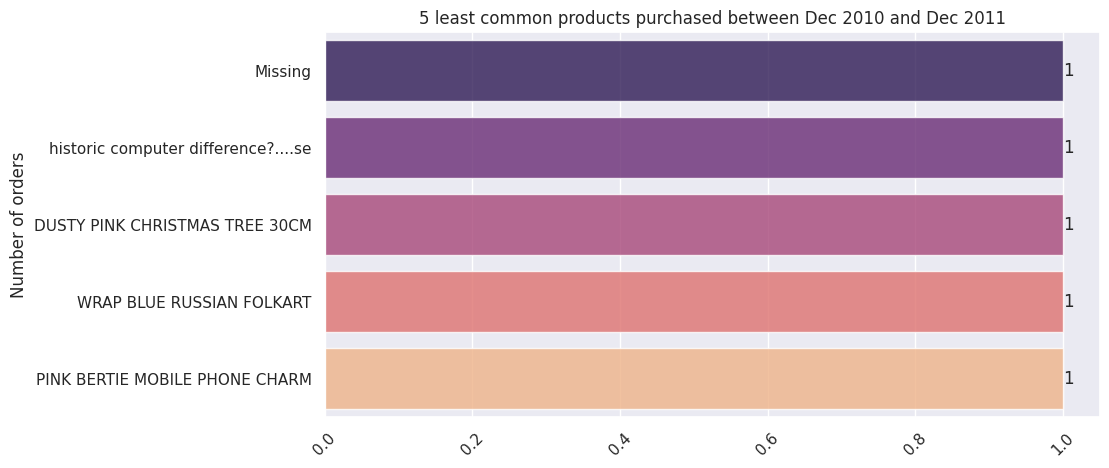

In [ ]:
description_count  = data["Description"].value_counts().tail()[:5]
plt.figure(figsize=(10,5))
ax = sns.barplot(x=description_count.values, y=description_count.index, alpha=0.8, palette="magma")
ax.bar_label(ax.containers[0])
plt.title("5 least common products purchased between Dec 2010 and Dec 2011")
plt.ylabel("Number of orders", fontsize=12)
plt.xticks(rotation=45)
plt.show()

### **Top 10 Items Sold by Total Quantity**

In [ ]:
df_quan = data.groupby('Description')['Quantity'].sum().reset_index()
df_quan.columns = ['Description', 'Total_Quantity']

df_quan_top15 = df_quan.nlargest(15, 'Total_Quantity')

pd.DataFrame(df_quan_top15).style.background_gradient(cmap="coolwarm")

,Description,Total_Quantity
4009,WORLD WAR 2 GLIDERS ASSTD DESIGNS,53847
1866,JUMBO BAG RED RETROSPOT,47363
244,ASSORTED COLOUR BIRD ORNAMENT,36381
2740,POPCORN HOLDER,36334
2395,PACK OF 72 RETROSPOT CAKE CASES,36039
3918,WHITE HANGING HEART T-LIGHT HOLDER,35317
2803,RABBIT NIGHT LIGHT,30680
2161,MINI PAINT SET VINTAGE,26437
2361,PACK OF 12 LONDON TISSUES,26315
2393,PACK OF 60 PINK PAISLEY CAKE CASES,24753


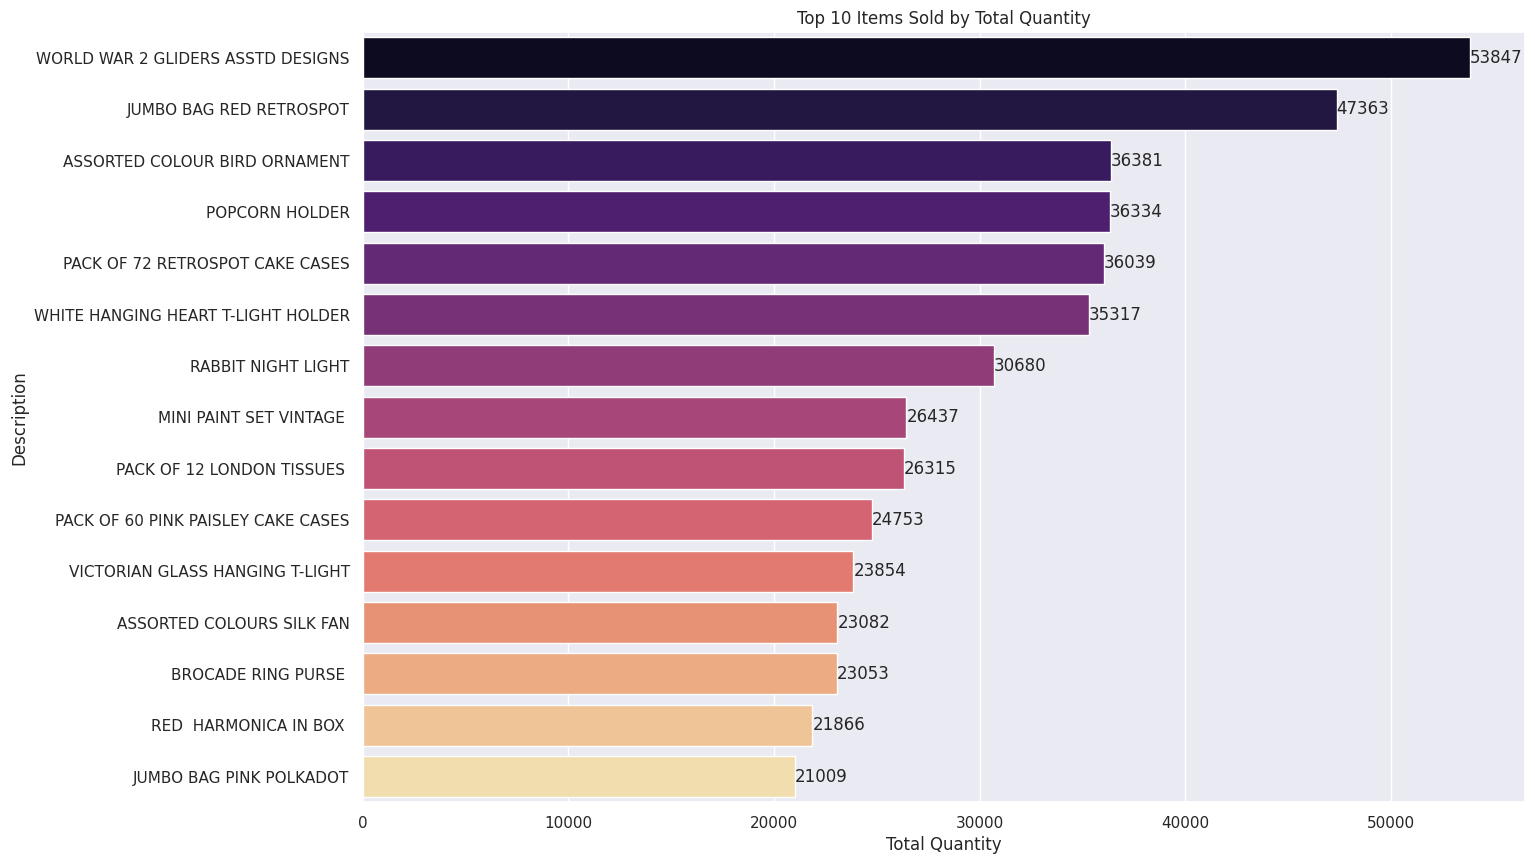

In [ ]:
plt.figure(figsize=(15, 10))
ax = sns.barplot(data=df_quan_top15, x="Total_Quantity", y="Description", capsize=3, palette="magma")
ax.bar_label(ax.containers[0])
plt.title("Top 10 Items Sold by Total Quantity")
plt.xlabel("Total Quantity")
plt.ylabel("Description")
plt.show()

### **Most Popular Items bought first by the Customers**

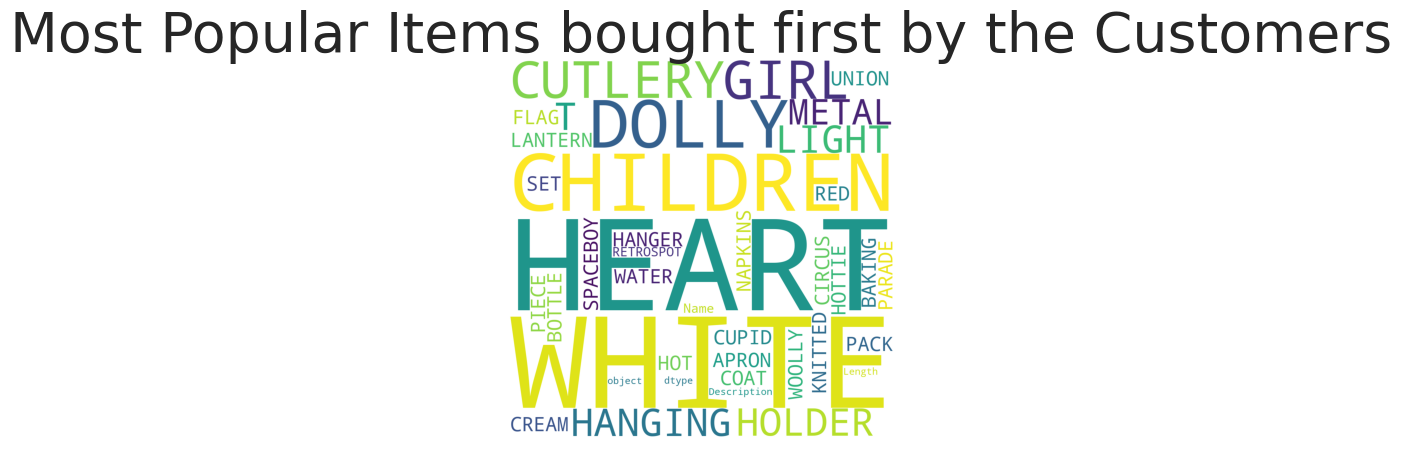

In [ ]:
plt.rcParams['figure.figsize'] = (5, 5)
wordcloud = WordCloud(background_color = 'white', width = 1200,  height = 1200, max_words = 50).generate(str(data['Description']))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Most Popular Items bought first by the Customers',fontsize = 40)
plt.show()

### **Analysis Of Sales By Date**

In [ ]:
data["InvoiceDate"].dt.year

0         2010
1         2010
2         2010
3         2010
4         2010
          ... 
541904    2011
541905    2011
541906    2011
541907    2011
541908    2011
Name: InvoiceDate, Length: 541909, dtype: int64

In [ ]:
sales_by_date = data.groupby(data["InvoiceDate"].dt.year)["Quantity"].sum().sort_values(ascending=False)
sales_by_date

InvoiceDate
2011    4834222
2010     342228
Name: Quantity, dtype: int64

<Figure size 2000x1000 with 0 Axes>

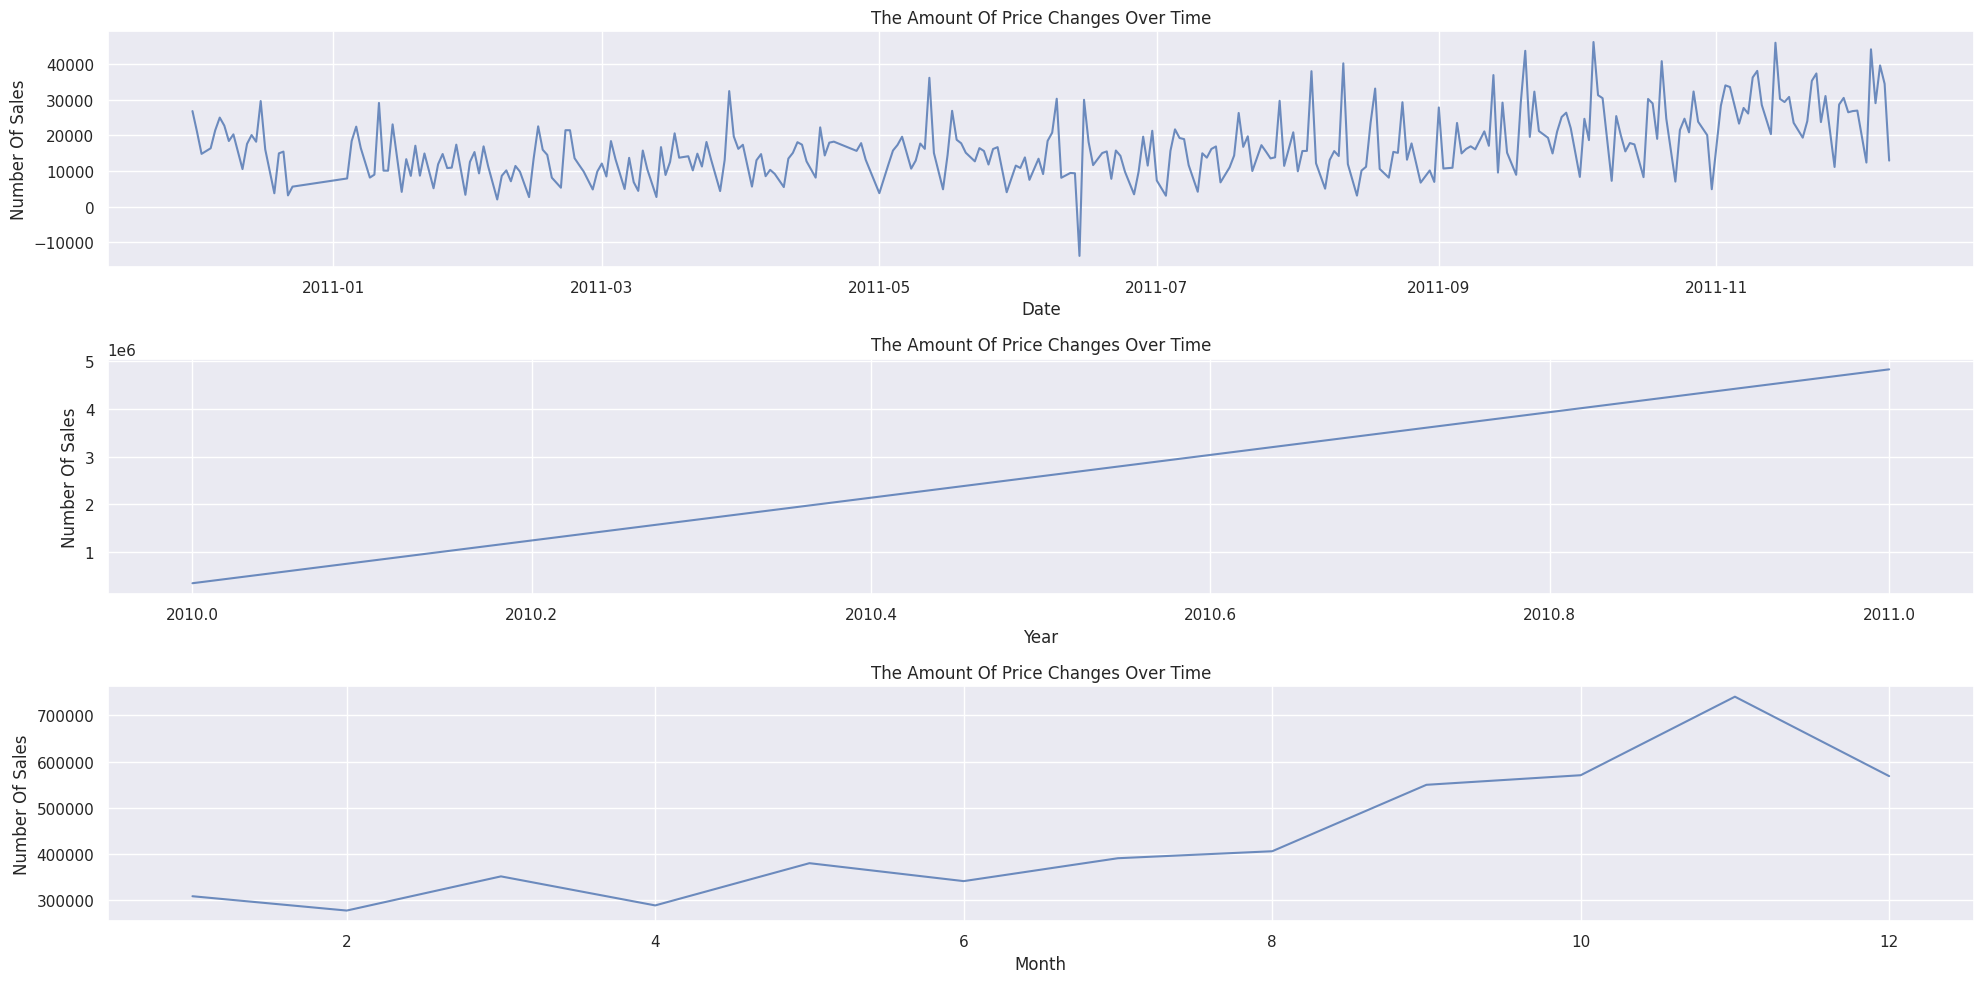

In [ ]:
# Analysis of sales by date
sales_by_date = data.groupby(data["InvoiceDate"].dt.date)["Quantity"].sum()
sales_by_year = data.groupby(data["InvoiceDate"].dt.year)["Quantity"].sum()
sales_by_month = data.groupby(data["InvoiceDate"].dt.month)["Quantity"].sum()

plt.figure(figsize=(20, 10))
fig, ax = plt.subplots(3, 1, figsize=(20, 10))

sns.lineplot(x=sales_by_date.index, y=sales_by_date.values, alpha=0.8, ax=ax[0])
ax[0].set_title("The Amount Of Price Changes Over Time")
ax[0].set_xlabel("Date")
ax[0].set_ylabel("Number Of Sales")

sns.lineplot(x=sales_by_year.index, y=sales_by_year.values, alpha=0.8, ax=ax[1])
ax[1].set_title("The Amount Of Price Changes Over Time")
ax[1].set_xlabel("Year")
ax[1].set_ylabel("Number Of Sales")

sns.lineplot(x=sales_by_month.index, y=sales_by_month.values, alpha=0.8, ax=ax[2])
ax[2].set_title("The Amount Of Price Changes Over Time")
ax[2].set_xlabel("Month")
ax[2].set_ylabel("Number Of Sales")

plt.tight_layout()
plt.show()

- **Sales By Date:** The sales volume by day appears to have increased over time, with the number of transactions showing an upward trend.

- **Sales By Year:** In the chart showing sales by year, the total number of items sold each year has increased, and it is displayed in an ascending trend.

- **Sales By Month:** In the chart representing sales by month, we can also observe an increase in the number of transactions and the total quantity of items sold in different months.

**This ascending trend may be the result of an increase in the number of customers, improved marketing strategies, or business opportunities.**

### **Analysis Of Changes In Commodity Prices Over Time**

<Figure size 2000x1000 with 0 Axes>

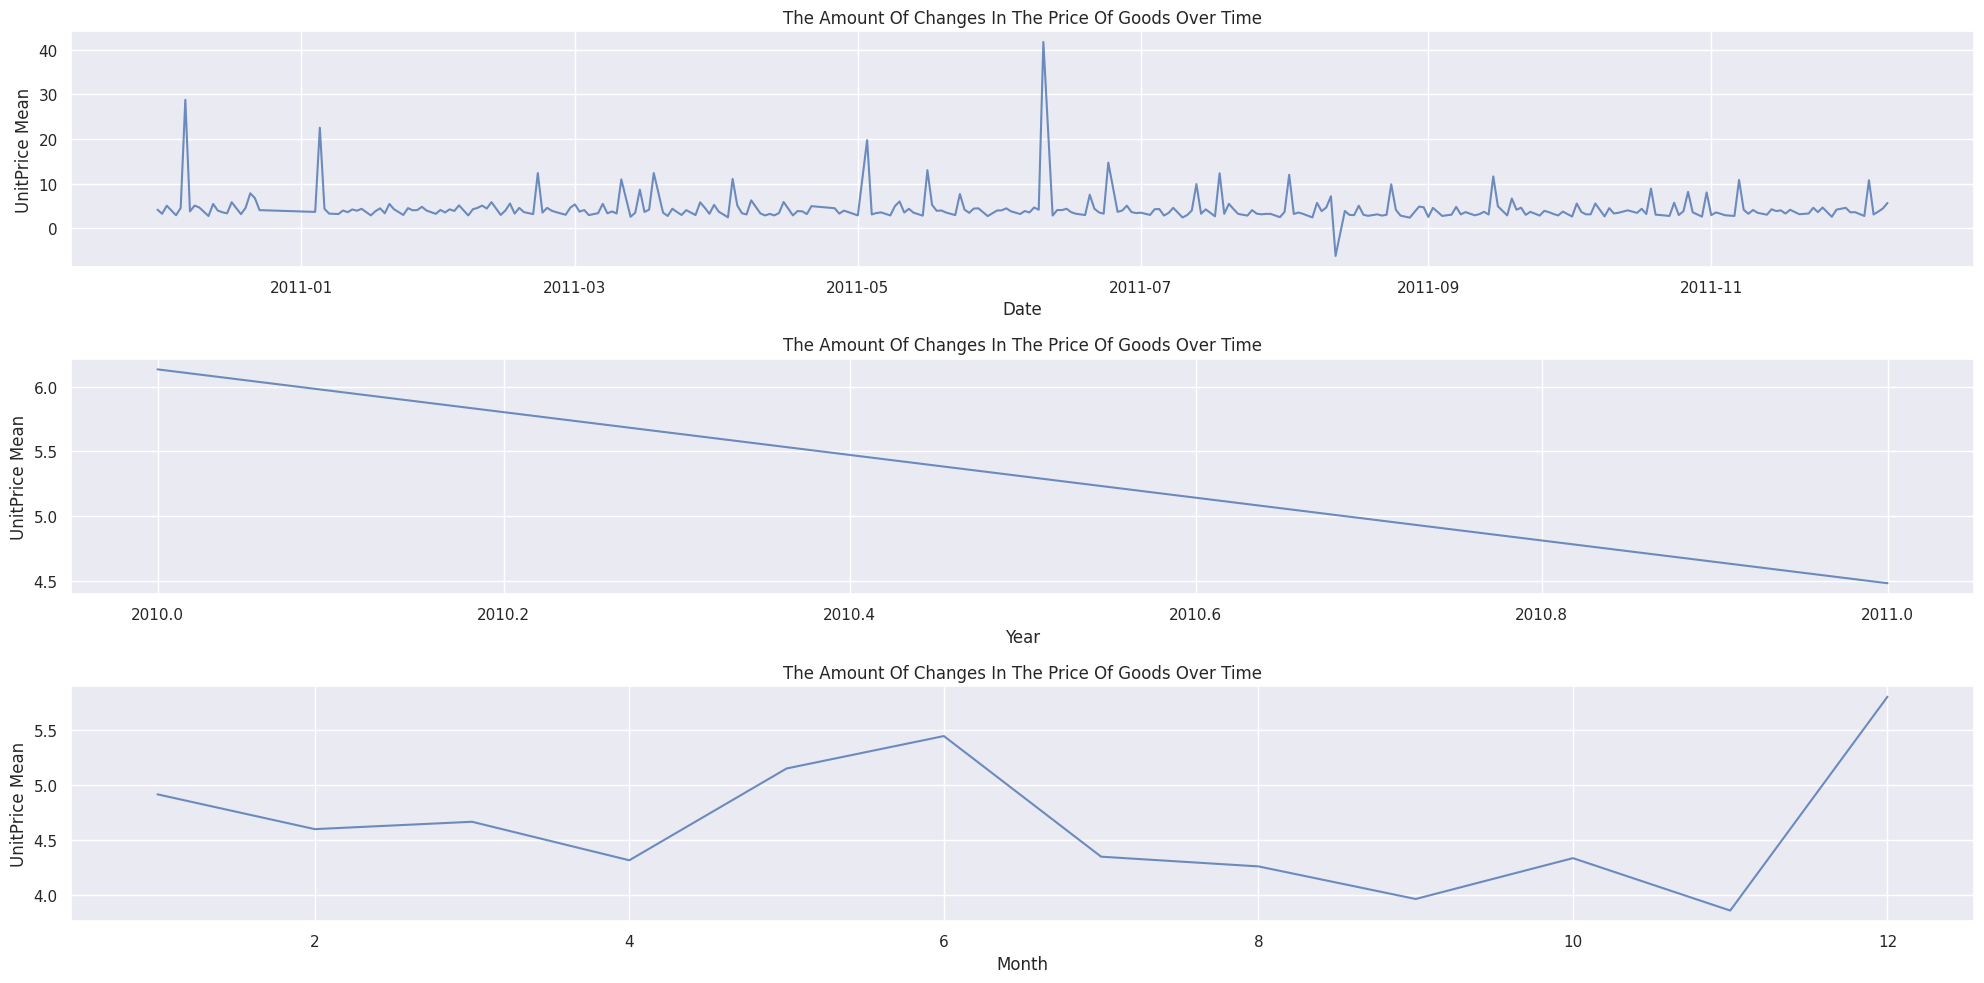

In [ ]:
price_changes_over_time_date = data.groupby(data["InvoiceDate"].dt.date)["UnitPrice"].mean()
price_changes_over_time_year = data.groupby(data["InvoiceDate"].dt.year)["UnitPrice"].mean()
price_changes_over_time_month = data.groupby(data["InvoiceDate"].dt.month)["UnitPrice"].mean()


plt.figure(figsize=(20, 10))
fig, ax = plt.subplots(3, 1, figsize=(20, 10))

sns.lineplot(x=price_changes_over_time_date.index, y=price_changes_over_time_date.values, alpha=0.8, ax=ax[0])
ax[0].set_title("The Amount Of Changes In The Price Of Goods Over Time")
ax[0].set_xlabel("Date")
ax[0].set_ylabel("UnitPrice Mean")

sns.lineplot(x=price_changes_over_time_year.index, y=price_changes_over_time_year.values, alpha=0.8, ax=ax[1])
ax[1].set_title("The Amount Of Changes In The Price Of Goods Over Time")
ax[1].set_xlabel("Year")
ax[1].set_ylabel("UnitPrice Mean")

sns.lineplot(x=price_changes_over_time_month.index, y=price_changes_over_time_month.values, alpha=0.8, ax=ax[2])
ax[2].set_title("The Amount Of Changes In The Price Of Goods Over Time")
ax[2].set_xlabel("Month")
ax[2].set_ylabel("UnitPrice Mean")

plt.tight_layout()
plt.show()

- **Since prices have decreased, products may have become more attractive to customers, leading to an increase in demand and sales volume.**

- **Furthermore, the price reductions can encourage customers to make more purchases and increase the number of transactions.**

- **This decrease in prices may have significantly improved the purchasing power of customers, which can contribute to sales growth.**

**In general, changes in prices and customer purchasing power can have a significant impact on sales volume.**

### **The Top 5 Countries That Have The Most Sales**

In [ ]:
pd.DataFrame({
    "The_Number_Of_Sales": data.groupby("Country")["Quantity"].sum().sort_values(ascending=False)[:5]
}).style.background_gradient(cmap="coolwarm")

,The_Number_Of_Sales
Country,
United Kingdom,4263829
Netherlands,200128
EIRE,142637
Germany,117448
France,110480


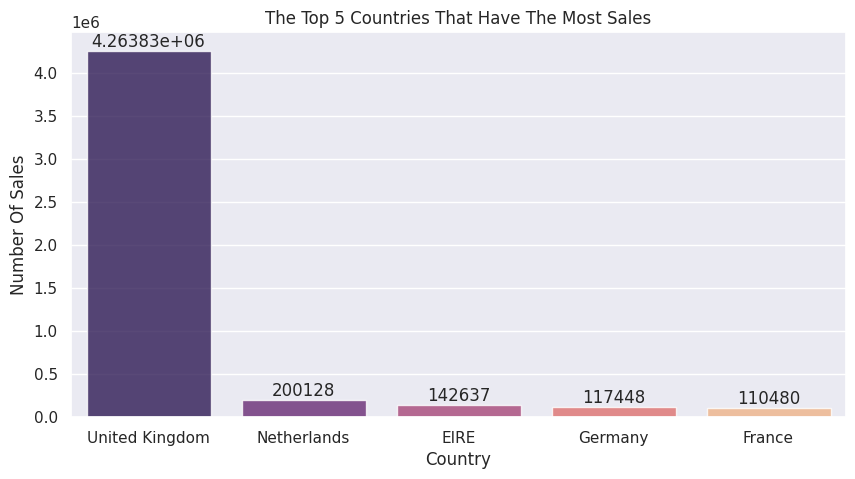

In [ ]:
sales_by_country = data.groupby("Country")["Quantity"].sum().sort_values(ascending=False)[:5]
plt.figure(figsize=(10, 5))
ax = sns.barplot(x=sales_by_country.index, y=sales_by_country.values, alpha=0.8, palette="magma")
ax.bar_label(ax.containers[0])
plt.title("The Top 5 Countries That Have The Most Sales")
plt.xlabel("Country")
plt.ylabel("Number Of Sales")
plt.show()

# **Preprocessing**

In [ ]:
data.dropna(inplace=True)
data.drop_duplicates(inplace=True)

In [ ]:
def outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1

    mask = ((data < (Q1 - 2.5 * IQR)) | (data > (Q3 + 2.5 * IQR)))

    return mask

data = data[~outliers(data["Quantity"])]
data = data[~outliers(data["UnitPrice"])]

In [ ]:
data["CustomerID"] = data["CustomerID"].astype("int64")

data["InvoiceDay"] = data["InvoiceDate"].apply(lambda x: dt.datetime(x.year, x.month, x.day))
data['TotalSum'] = data['Quantity'] * data['UnitPrice']

pin_date = max(data['InvoiceDate']) + dt.timedelta(1)

In [ ]:
rfm = data.groupby("CustomerID").agg({
    "InvoiceDay": lambda x: (pin_date - x.max()).days,
    "InvoiceNo": "count",
    "TotalSum": "sum"
})
rfm

,InvoiceDay,InvoiceNo,TotalSum
CustomerID,,,
12347,3,176,3783.23
12348,249,6,90.20
12349,19,67,1307.05
12350,311,16,294.40
12352,37,82,1201.66
...,...,...,...
18280,278,10,180.60
18281,181,5,46.92
18282,8,9,111.68


In [ ]:
rfm.rename(columns={
    "InvoiceDay": "Recency",
    "InvoiceNo": "Frequency",
    "TotalSum": "Monetary"
}, inplace=True)

rfm

,Recency,Frequency,Monetary
CustomerID,,,
12347,3,176,3783.23
12348,249,6,90.20
12349,19,67,1307.05
12350,311,16,294.40
12352,37,82,1201.66
...,...,...,...
18280,278,10,180.60
18281,181,5,46.92
18282,8,9,111.68


In [ ]:
r_labels = range(4, 0, -1) #[4, 3, 2, 1]
r_groups = pd.qcut(rfm["Recency"], q=4, labels=r_labels)

f_labels = range(1, 5) # [1, 2, 3, 4]
f_groups = pd.qcut(rfm["Frequency"], q=4, labels=f_labels)

m_labels = range(1, 5) # [1, 2, 3, 4]
m_groups = pd.qcut(rfm["Monetary"], q=4, labels=m_labels)

In [ ]:
rfm["R"] = r_groups.values
rfm["F"] = f_groups.values
rfm["M"] = m_groups.values
rfm

,Recency,Frequency,Monetary,R,F,M
CustomerID,,,,,,
12347,3,176,3783.23,4,4,4
12348,249,6,90.20,1,1,1
12349,19,67,1307.05,3,3,4
12350,311,16,294.40,1,1,2
12352,37,82,1201.66,3,3,3
...,...,...,...,...,...,...
18280,278,10,180.60,1,1,1
18281,181,5,46.92,1,1,1
18282,8,9,111.68,4,1,1


In [ ]:
X = rfm[["R", "F", "M"]]

ss = StandardScaler()
X = ss.fit_transform(X)

# **Modeling**

## **KMeans**

In [ ]:
kmeans = KMeans(n_clusters=10, init="k-means++", max_iter=300)
kmeans.fit(X)

KMeans(n_clusters=10)

In [ ]:
rfm['kmeans_cluster'] = kmeans.labels_
rfm

,Recency,Frequency,Monetary,R,F,M,kmeans_cluster
CustomerID,,,,,,,
12347,3,176,3783.23,4,4,4,4
12348,249,6,90.20,1,1,1,5
12349,19,67,1307.05,3,3,4,3
12350,311,16,294.40,1,1,2,5
12352,37,82,1201.66,3,3,3,3
...,...,...,...,...,...,...,...
18280,278,10,180.60,1,1,1,5
18281,181,5,46.92,1,1,1,5
18282,8,9,111.68,4,1,1,1


In [ ]:
inertia = kmeans.inertia_
print(f"inertia: {inertia}")

inertia: 1558.6203763289982


<Axes: >

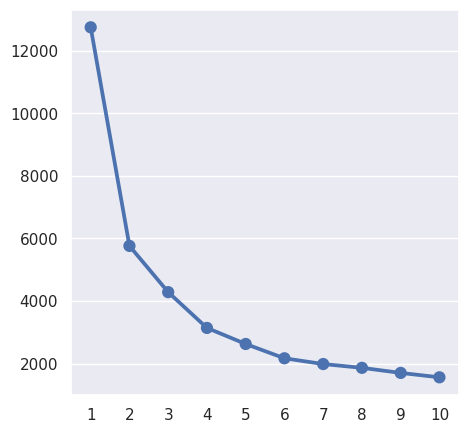

In [ ]:
wcss = {}

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init="k-means++", max_iter=300)
    kmeans.fit(X)
    wcss[k] = kmeans.inertia_

sns.pointplot(x=list(wcss.keys()), y=list(wcss.values()))

In [ ]:
silhouette = silhouette_score(X, kmeans.labels_)
print(f"silhouette score: {silhouette}")

silhouette score: 0.45736383715024526


In [ ]:
customers_g4 = list(rfm[rfm['kmeans_cluster'] == 4].index)
top_products_g4 = data.query('CustomerID == @customers_g4').groupby(['Description'])['Quantity'].sum().sort_values(ascending=False).head(10)
dict(top_products_g4)

{'WHITE HANGING HEART T-LIGHT HOLDER': 10234,
 'JUMBO BAG RED RETROSPOT': 8951,
 'ASSORTED COLOUR BIRD ORNAMENT': 8554,
 'PACK OF 72 RETROSPOT CAKE CASES': 7980,
 'LUNCH BAG RED RETROSPOT': 7329,
 'LUNCH BAG  BLACK SKULL.': 5287,
 'JAM MAKING SET PRINTED': 4876,
 '60 TEATIME FAIRY CAKE CASES': 4840,
 'LUNCH BAG CARS BLUE': 4706,
 'LUNCH BAG APPLE DESIGN': 4703}

In [ ]:
# Generate offers based on the most purchased products in each cluster
def product_recommend_cluster(cluster):
    recommended_products = {}

    for cluster in range(10):
        cluster_data = rfm[rfm["kmeans_cluster"] == cluster]
        max_purchase_product = data[data["CustomerID"].isin(cluster_data.index)].groupby(["Description"])["Quantity"].sum().idxmax()
        recommended_products[cluster] = max_purchase_product
    return recommended_products

recommended_products = product_recommend_cluster(10)
# Show offers to users
pd.DataFrame({
    "Cluster": list(recommended_products.keys()),
    "RecommendedProduct": list(recommended_products.values())
}).style.background_gradient(cmap="magma")

,Cluster,RecommendedProduct
0,0,WHITE HANGING HEART T-LIGHT HOLDER
1,1,WHITE HANGING HEART T-LIGHT HOLDER
2,2,WHITE HANGING HEART T-LIGHT HOLDER
3,3,PACK OF 72 RETROSPOT CAKE CASES
4,4,WHITE HANGING HEART T-LIGHT HOLDER
5,5,WHITE HANGING HEART T-LIGHT HOLDER
6,6,ASSORTED COLOUR BIRD ORNAMENT
7,7,WOODEN STAR CHRISTMAS SCANDINAVIAN
8,8,ANTIQUE SILVER T-LIGHT GLASS
9,9,BUBBLEGUM RING ASSORTED


In [ ]:
# Generate proposals for each client
customer_recommendations = {}

for cluster in range(10):
    # Selection of customers who belong to the respective cluster
    cluster_data = rfm[rfm['kmeans_cluster'] == cluster]

    # Find the product with the most purchases in this cluster
    max_purchase_product = data[data['CustomerID'].isin(cluster_data.index)].groupby('Description')['Quantity'].sum().idxmax()

    # Find customers who have not purchased this product
    customers_without_max_product = data[data['Description'] == max_purchase_product][~data['CustomerID'].isin(cluster_data.index)]

    # Add the product to the offer list for each customer
    for customer_id in customers_without_max_product['CustomerID'].unique():
        if customer_id not in customer_recommendations:
            # If the customer is getting the recommended products for the first time, make the offer list empty (empty list).
            customer_recommendations[customer_id] = []

        # Offer the customer the most purchased products
        customer_recommendations[customer_id].append(max_purchase_product)

# Adding the cluster for each customer to the offers dataframe
for customer_id, recommended_products in customer_recommendations.items():
    cluster = rfm.loc[rfm.index == customer_id, 'kmeans_cluster'].values[0]
    customer_recommendations[customer_id].append(cluster)

    # Adding a column to the dataframe for customers who receive the recommended products for the first time
    if len(recommended_products) > 2:
        first_time_customer = False
    else:
        first_time_customer = True
    customer_recommendations[customer_id].append(first_time_customer)


pd.set_option('display.max_rows', 1000000)
pd.DataFrame({
    'CustomerID': list(customer_recommendations.keys()),
    'RecommendedProducts': [', '.join(recommended_products[:-2]) for recommended_products in customer_recommendations.values()],
    "FirstTimeCustomer": [recommended_products[-1] for recommended_products in customer_recommendations.values()],
    'Cluster': [recommended_products[-2] for recommended_products in customer_recommendations.values()]
}).sort_values(by="Cluster").style.background_gradient(cmap="magma")

,CustomerID,RecommendedProducts,FirstTimeCustomer,Cluster
927,12633,PACK OF 72 RETROSPOT CAKE CASES,True,0
760,16735,"WHITE HANGING HEART T-LIGHT HOLDER, WHITE HANGING HEART T-LIGHT HOLDER, WHITE HANGING HEART T-LIGHT HOLDER, WHITE HANGING HEART T-LIGHT HOLDER, ASSORTED COLOUR BIRD ORNAMENT, ANTIQUE SILVER T-LIGHT GLASS",False,0
759,13593,"WHITE HANGING HEART T-LIGHT HOLDER, WHITE HANGING HEART T-LIGHT HOLDER, WHITE HANGING HEART T-LIGHT HOLDER, WHITE HANGING HEART T-LIGHT HOLDER",False,0
758,17230,"WHITE HANGING HEART T-LIGHT HOLDER, WHITE HANGING HEART T-LIGHT HOLDER, WHITE HANGING HEART T-LIGHT HOLDER, WHITE HANGING HEART T-LIGHT HOLDER",False,0
757,15464,"WHITE HANGING HEART T-LIGHT HOLDER, WHITE HANGING HEART T-LIGHT HOLDER, WHITE HANGING HEART T-LIGHT HOLDER, WHITE HANGING HEART T-LIGHT HOLDER, ASSORTED COLOUR BIRD ORNAMENT",False,0
756,15164,"WHITE HANGING HEART T-LIGHT HOLDER, WHITE HANGING HEART T-LIGHT HOLDER, WHITE HANGING HEART T-LIGHT HOLDER, WHITE HANGING HEART T-LIGHT HOLDER, ASSORTED COLOUR BIRD ORNAMENT",False,0
1636,14841,ANTIQUE SILVER T-LIGHT GLASS,True,0
755,16477,"WHITE HANGING HEART T-LIGHT HOLDER, WHITE HANGING HEART T-LIGHT HOLDER, WHITE HANGING HEART T-LIGHT HOLDER, WHITE HANGING HEART T-LIGHT HOLDER",False,0
1634,13213,ANTIQUE SILVER T-LIGHT GLASS,True,0
754,14472,"WHITE HANGING HEART T-LIGHT HOLDER, WHITE HANGING HEART T-LIGHT HOLDER, WHITE HANGING HEART T-LIGHT HOLDER, WHITE HANGING HEART T-LIGHT HOLDER, ASSORTED COLOUR BIRD ORNAMENT",False,0


## **Important note:**
**In this code, first, it recommends top-selling products to customers who have made purchases before. Then, it performs the same action for customers who are making their first purchase.**

**The result of this code is a list of customers and the recommended products for each of them.**